# Přehled generovaných dat


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from pprint import pprint
import community

In [2]:
with open('data_generator/example_data.json') as f:
    data = eval(f.read())

## Přehled jednoho záznamu

In [3]:
type(data)

list

In [4]:
pprint(data[0])

{'coffee': 'coffee_21',
 'customer': 'customer_7',
 'rating': {'aroma': 41,
            'color': 37,
            'environment': 33,
            'service': 54,
            'smell': 28,
            'taste': 54}}


## Tvorba grafu

In [5]:
env_graph = nx.Graph()
taste_graph = nx.Graph()
graphs = [env_graph, taste_graph]
params = ['environment', 'taste']
customers = set()
coffees = set()
def checkNode(node, _set, _type, graphs):
    if not node in _set:
        _set.add(node)
        for G in graphs: G.add_node(node, type=_type)
    return node
def add_edges(customer, coffee, rating, graphs, params):
    for G, param in zip(graphs, params):
        G.add_edge(customer, coffee, weight=rating[param])
for rating in data:
    customer = checkNode(rating['customer'], customers, 0, graphs)
    coffee = checkNode(rating['coffee'], coffees, 1, graphs)
    add_edges(customer, coffee, rating['rating'], graphs, params)

In [6]:
print('pocet recenzi', len(env_graph.edges), len(taste_graph.edges))
print('pocet vrcholu', len(env_graph.nodes), len(taste_graph.nodes))
for t,T in enumerate(['uživatelů', 'kaváren']):
    print('z toho {}'.format(T), [len([n for n in G.nodes if G.nodes[n]['type'] == t]) for G in graphs])

pocet recenzi 750 750
pocet vrcholu 65 65
z toho uživatelů [15, 15]
z toho kaváren [50, 50]


### Uložení grafu

In [7]:
for G, param in zip(graphs, params):
    nx.write_gexf(G, 'graph_{}.gexf'.format(param))

### Vizualizace grafu
S detekcí komunit: https://github.com/taynaud/python-louvain.

In [8]:
def drawGraph(G):
    layout = nx.spring_layout(G)
    sizes = [45 if G.nodes[n]['type'] else 15 for n in G.nodes]
    partition = [community.best_partition(G)[n] for n in G.nodes]
    nx.draw(G, layout, node_size=sizes, node_color=partition)

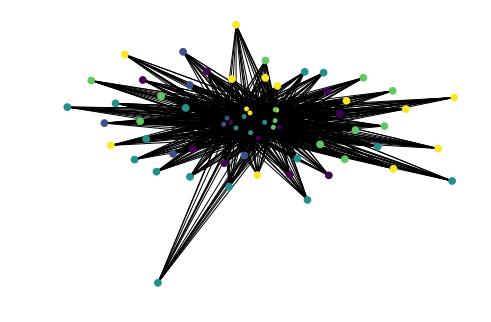

In [9]:
drawGraph(env_graph)

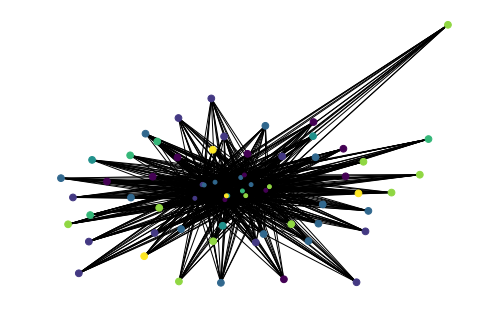

In [10]:
drawGraph(taste_graph)

In [11]:
def showAdjacency(G):
    adjacency = nx.adjacency_matrix(G, nodelist=sorted(G.nodes))
    plt.matshow(adjacency.todense())

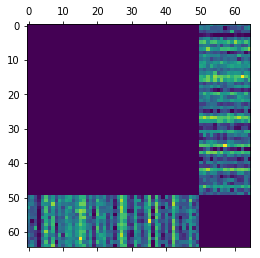

In [12]:
showAdjacency(env_graph)

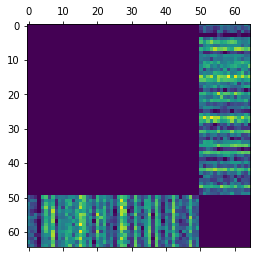

In [13]:
showAdjacency(taste_graph)

In [14]:
def getIncidency(G):
    nodelist = sorted(G.nodes)
    adjacency = nx.adjacency_matrix(G, nodelist=nodelist).todense()
    types = [G.nodes[n]['type'] for n in nodelist]
    return adjacency[[n for n,t in enumerate(types) if t == 0]][:,[n for n,t in enumerate(types) if t == 1]]

In [15]:
def showIncidency(G):
    incidency = getIncidency(G)
    plt.matshow(incidency)

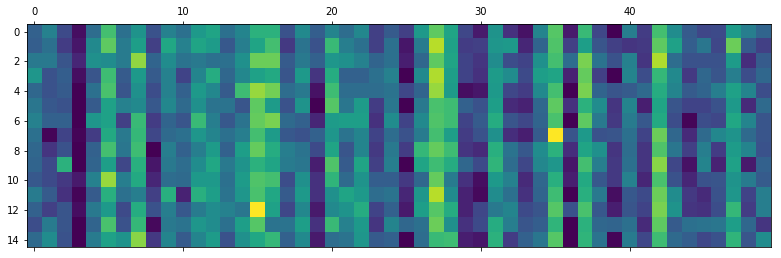

In [16]:
showIncidency(env_graph)

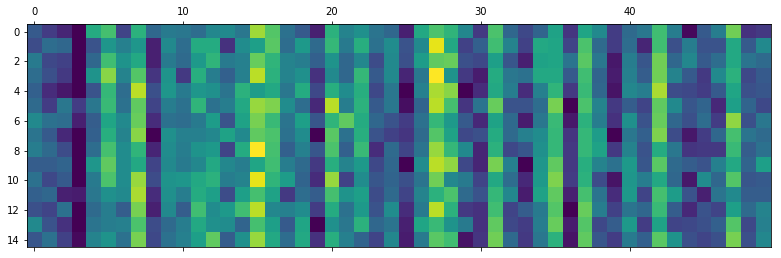

In [17]:
showIncidency(taste_graph)

## Biclustering

In [23]:
import sys
sys.path.append('c:\\Users\\Tomas\\Documents\\FJFI\\1400bp-zikmund-tomas\\Software\\15 TINcc')
import Itcc
import numpy as np

In [24]:
initRowClusters = [i % 5 for i,_ in enumerate(customers)]
initColumnClusters = [i % 5 for i,_ in enumerate(coffees)]
incidencyMatrix = getIncidency(taste_graph)
model = Itcc.ItccModel(incidencyMatrix/np.sum(incidencyMatrix), initRowClusters, initColumnClusters)
itcc = Itcc.Itcc()
itcc.updateClusterMatrices(model)
itcc.updatePs(model)

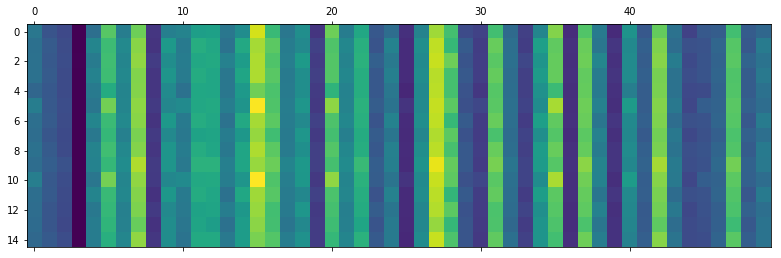

In [25]:
plt.matshow(model.Q)

In [26]:
itcc.Iteration(model)
itcc.Evaluation(model)

4889.81620523478

In [27]:
itcc.Iteration(model)
itcc.Evaluation(model)

4886.985938486474

In [28]:
itcc.Iteration(model)
itcc.Evaluation(model)

4886.985938486474

In [29]:
itcc.Iteration(model)
itcc.Evaluation(model)

4886.985938486474

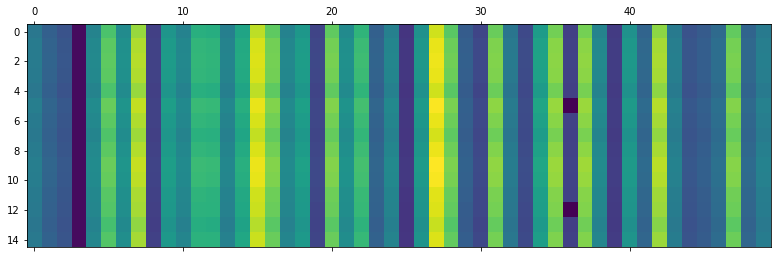

In [30]:
plt.matshow(model.Q)

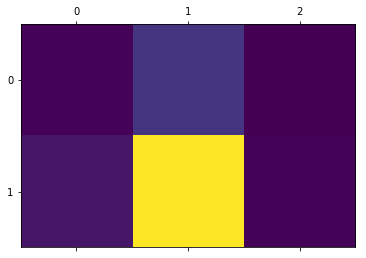

In [31]:
plt.matshow(model.PXhatYhat)

## Závěr
Algoritmus našel 2 třídy uživatelů a 3 skupiny kaváren. 